In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

Using TensorFlow backend.


In [2]:
"""==========
   dataset 가져오기
   =========="""

base_path = 'dataset/training'

img_list = glob.glob(os.path.join(base_path, '*/*')) + glob.glob(os.path.join(base_path, '*/*/*'))

print(len(img_list))

4964


In [3]:
"""==========
   train, test dataset 만들기
   =========="""

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
"""
* ImageDataGenerator 인수 정리
rotation_range: 이미지 회전 범위 (degrees)
width_shift, height_shift: 그림을 수평 또는 수직으로 랜덤하게 평행 이동시키는 범위 (원본 가로, 세로 길이에 대한 비율 값)
rescale: 원본 영상은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높습니다 (통상적인 learning rate를 사용할 경우). 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜줍니다. 이는 다른 전처리 과정에 앞서 가장 먼저 적용됩니다.
shear_range: 임의 전단 변환 (shearing transformation) 범위
zoom_range: 임의 확대/축소 범위
horizontal_flip: True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집습니다. 원본 이미지에 수평 비대칭성이 없을 때 효과적입니다. 즉, 뒤집어도 자연스러울 때 사용하면 좋습니다.
fill_mode 이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
"""


test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# flow_from_directory() : 폴더 형테의 데이터 구조 가지고 옴
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 4453 images belonging to 6 classes.
Found 491 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [4]:
"""==========
   모델 구성하기
   =========="""

# CNN/ 케라스 컨볼루션 신경망 레이어(Conv2D)
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

In [5]:
"""==========
   모델 학습과정 설정하기
   =========="""

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)      

In [12]:
"""==========
   모델 학습하기_1
   =========="""

model.fit_generator(train_generator, steps_per_epoch=15, epochs=5, validation_data=validation_generator,validation_steps=5)

Epoch 1/5
15/15 [==============================] - 155s 10s/step - loss: 1.7068 - acc: 0.2542 - val_loss: 1.3682 - val_acc: 0.2250
Epoch 2/5
15/15 [==============================] - 144s 10s/step - loss: 1.6055 - acc: 0.2208 - val_loss: 1.6470 - val_acc: 0.3000
Epoch 3/5
15/15 [==============================] - 145s 10s/step - loss: 1.5885 - acc: 0.3000 - val_loss: 1.5820 - val_acc: 0.4125
Epoch 4/5
15/15 [==============================] - 108s 7s/step - loss: 1.5110 - acc: 0.3208 - val_loss: 1.6847 - val_acc: 0.3125
Epoch 5/5
15/15 [==============================] - 116s 8s/step - loss: 1.5149 - acc: 0.3125 - val_loss: 1.7576 - val_acc: 0.2875


In [6]:
"""==========
   모델 학습하기_2
   =========="""
hist = model.fit_generator(train_generator, epochs=3, validation_data=validation_generator)

Epoch 1/3
279/279 [==============================] - 2691s 10s/step - loss: 1.5839 - acc: 0.3052 - val_loss: 1.5874 - val_acc: 0.3136
Epoch 2/3
279/279 [==============================] - 7564s 27s/step - loss: 1.3614 - acc: 0.4283 - val_loss: 1.0278 - val_acc: 0.4868
Epoch 3/3
279/279 [==============================] - 2951s 11s/step - loss: 1.2301 - acc: 0.4830 - val_loss: 1.3792 - val_acc: 0.5682


In [7]:
"""==========
   모델 평가하기
   =========="""

print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 62.50%


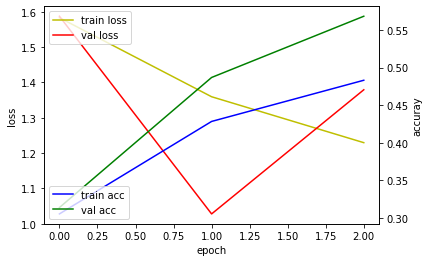

In [8]:
# 모델 학습 그래프 확인
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
# 모델 저장
model_json = model.to_json()
with open("model/model.json", "w") as json_file : 
    json_file.write(model_json)

# 모델 weight 저장
keras_file="weight/garbage.h5"
model.save(keras_file)